# Analysis of Microarray & Microtiter plates
Analysis of peptide-virus binding signals.

This notebook provides simple visualisation and analysis functions to work with experimental data sets from the FluType project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import normalize
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.colors as colors
from IPython.display import display, HTML

## Load dataset for analysis
Here the different data sets are loaded and brought in a common standard format for the analysis pipeline.

In [2]:
data_ids = {'2017-05-12_MTP_R1','2017-05-12_MTP_R1_div_back' ,'flutype_test','2017-05-19_N10' \
         ,'2017-05-12_MTP_R1_sub_back'}

#--------------------------
data_id = '2017-05-12_MTP_R1'
#data_id = '2017-05-12_MTP_R1_sub_back'
#data_id = '2017-05-19_N10'
#data_id = 'flutype_test'
#data_id ='2017-05-12_MTP_R1_div_back'
#--------------------------
if any(data_id == d_id for d_id in ['2017-05-12_MTP_R1', \
                                    '2017-05-12_MTP_R1_div_back']):
    # Microtiter Plate (2017-05-12, 1 plate, 1/3 repeats)
    meta = pd.read_csv("data/{}.meta".format(data_id), sep='\t')
    output = pd.read_csv("data/{}.csv".format(data_id), sep=',', index_col=0)
    
    # load peptide and virus coordinates
    gal_pep = pd.read_csv("data/{}_pep.gal".format(data_id), sep='\t', index_col="ID")
    gal_vir = pd.read_csv("data/{}_vir.gal".format(data_id), sep='\t', index_col="ID")
    vir_cor = gal_vir.pivot(index="Row", columns="Column", values="Name")
    pep_cor = gal_pep.pivot(index="Row", columns="Column", values="Name")
    
if any(data_id == d_id for d_id in ['2017-05-12_MTP_R1_sub_back']):
    # Microtiter Plate (2017-05-12, 1 plate, 1/3 repeats)
    meta = pd.read_csv("data/{}.meta".format(data_id), sep='\t')
    output = pd.read_csv("data/{}.csv".format(data_id), sep=',', index_col=0)
    output_std = pd.read_csv("data/{}_std.csv".format(data_id), sep=',', index_col=0)
    # load peptide and virus coordinates
    gal_pep = pd.read_csv("data/{}_pep.gal".format(data_id), sep='\t', index_col="ID")
    gal_vir = pd.read_csv("data/{}_vir.gal".format(data_id), sep='\t', index_col="ID")
    vir_cor = gal_vir.pivot(index="Row", columns="Column", values="Name")
    pep_cor = gal_pep.pivot(index="Row", columns="Column", values="Name")
    

    
elif data_id == "flutype_test":
    # Microarray (1 plate, 1 measurement)
    meta = pd.read_csv("data/{}.meta".format(data_id), sep='\t')
    output = pd.read_csv("data/{}.csv".format(data_id) , sep='\t')
    output.index = output.virus
    output = output.drop('virus', 1)
    # load peptide and virus coordinates
    gal_pep = pd.read_csv("data/{}_pep.gal".format(data_id), sep='\t', index_col="ID")
    gal_vir = pd.read_csv("data/{}_vir.gal".format(data_id), sep='\t', index_col="ID")
    vir_cor = gal_vir.pivot(index="Row", columns="Column", values="Name")
    pep_cor = gal_pep.pivot(index="Row", columns="Column", values="Name")
    
elif data_id == "2017-05-19_N10":
    # Microarray (1 plate, 1 measurement)
    meta = pd.read_csv("data/{}.meta".format(data_id), sep='\t')
    output = pd.read_csv("data/{}.csv".format(data_id) ,index_col="Row", sep='\t')
    output.index.names = ['Row']
    output.columns.names = ['Column']
    # load peptide and virus coordinates
    gal_pep = pd.read_csv("data/{}_pep.gal".format(data_id), sep='\t', index_col="ID")
    gal_vir = pd.read_csv("data/{}_vir.gal".format(data_id), sep='\t', index_col="ID")
    vir_cor = gal_vir.pivot(index="Row", columns="Column", values="Name")
    pep_cor = gal_pep.pivot(index="Row", columns="Column", values="Name")



#merge complete spotinformation
vir_cor_unstacked=vir_cor.unstack()
Spot=pep_cor.unstack()
Spot=Spot.reset_index()
Spot=Spot.rename( columns={0: "Peptide"})
Spot["Virus"]= vir_cor_unstacked.values
Spot["Intensity"]=output.unstack().values
Spot["Std"] = 0

if 'output_std' in locals() :
    Spot["Std"] = output_std.unstack().values
    del output_std

Spot["Replica"]= 0

for virus_unique in Spot["Virus"].unique():
    for peptide_unique in Spot["Peptide"].unique():
        replica= 0
        for index in Spot.index:
            if Spot["Virus"][index]== virus_unique and Spot["Peptide"][index]== peptide_unique:
                Spot.set_value(index,"Replica",replica)
                replica+=1
    
    

print("-"*80)
print("meta data")
#display meta data 
display(meta.head())
print("-"*80)
print("Reader Output")
#display reader output
display(output.T.head())
print("-"*80)
print("peptide position")
#display peptide positions
display(pep_cor.T.head())
print("-"*80)
print("virus position")
#display virus positions
display(vir_cor.T.head())
print("-"*80)
print("Respaped as complete spot information")
#display complete spot information
display(Spot.head())
print("-"*80)
print("number of replica")
#Number of Replica
display(Spot.pivot_table(index="Virus",columns="Peptide",values="Intensity", aggfunc='count'))
print("-"*80)

--------------------------------------------------------------------------------
meta data


,field,info
0,type,Microtiter Plate
1,date,2017-05-12
2,repeat,1
3,total_repeats,3
4,virus,"[""X31A"",""X31"",""X31"",""X31"",""Pan"",""Pan"",""Pan"",""C..."


--------------------------------------------------------------------------------
Reader Output


21238,A,B,C,D,E,F,G,H
1,22508,21229,21266,21238,20484,14842,33306,17090
2,20337,22922,23449,23548,24198,17464,37703,20670
3,20394,21386,23071,26460,27889,17428,40646,22175
4,18970,19488,20933,23260,25058,17656,39031,22479
5,17500,16958,18548,18157,18304,15398,27502,17905


--------------------------------------------------------------------------------
peptide position


Row,1,2,3,4,5,6,7,8
Column,,,,,,,,
1,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
2,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
3,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
4,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer
5,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid 11,Fetuin,Peptid Nenad,Puffer


--------------------------------------------------------------------------------
virus position


Row,1,2,3,4,5,6,7,8
Column,,,,,,,,
1,X31C,X31C,X31C,X31C,X31C,X31C,X31C,X31C
2,X31A,X31A,X31A,X31A,X31A,X31A,X31A,X31A
3,X31A,X31A,X31A,X31A,X31A,X31A,X31A,X31A
4,X31A,X31A,X31A,X31A,X31A,X31A,X31A,X31A
5,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1,PAN1


--------------------------------------------------------------------------------
Respaped as complete spot information


,Column,Row,Peptide,Virus,Intensity,Std,Replica
0,1,1,Peptid 6,X31C,22508,0,0
1,1,2,Peptid 7,X31C,21229,0,0
2,1,3,Peptid 8,X31C,21266,0,0
3,1,4,Peptid 9,X31C,21238,0,0
4,1,5,Peptid 11,X31C,20484,0,0


--------------------------------------------------------------------------------
number of replica


Peptide,Fetuin,Peptid 11,Peptid 6,Peptid 7,Peptid 8,Peptid 9,Peptid Nenad,Puffer
Virus,,,,,,,,
CAL1,3,3,3,3,3,3,3,3
NO,2,2,2,2,2,2,2,2
PAN1,3,3,3,3,3,3,3,3
X31A,3,3,3,3,3,3,3,3
X31C,1,1,1,1,1,1,1,1


--------------------------------------------------------------------------------


## Heatmap of array/plate with peptide and virus information 

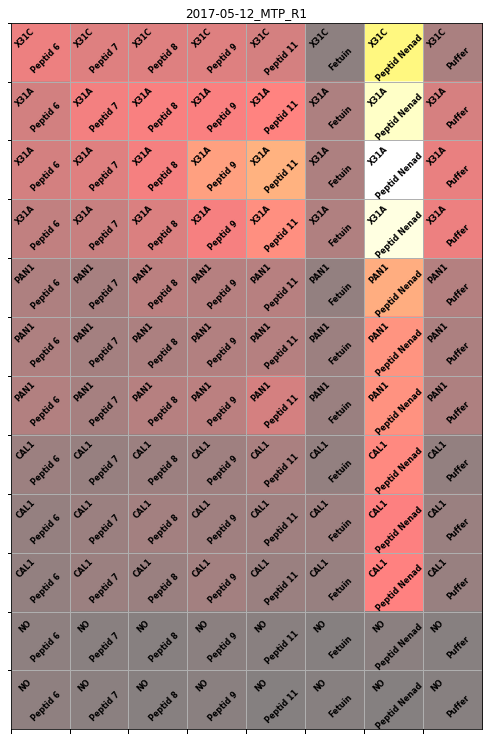

In [3]:
fig, ax = plt.subplots(figsize=(20,13))

#imshow portion
ax.imshow(Spot.pivot(index='Column', columns='Row', values='Intensity'), interpolation='nearest',  
          cmap="hot",alpha=0.5)
#plt.pcolor(Spot["Intensity"].unstack())
#text portion
x, y = np.meshgrid(vir_cor.index.values-1,vir_cor.columns.values-1)
for index in Spot.index:
    #print(y_val)
    ax.text(Spot["Row"].loc[index]-0.90, Spot["Column"].loc[index]-0.90, Spot["Peptide"].loc[index], 
            va='center', ha='center',fontsize=8,weight="bold",rotation=45)
    ax.text(Spot["Row"].loc[index]-1.25, Spot["Column"].loc[index]-1.25, Spot["Virus"].loc[index], 
            va='center', ha='center',fontsize=8,weight="bold",rotation=45)

#set tick marks for grid
ax.set_xticks(Spot["Row"].values-1.5)
ax.set_yticks(Spot["Column"].values-1.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(x.min()-0.5, x.max()+0.5)
ax.set_ylim(y.max()+0.5, y.min()-0.5)
ax.grid()
plt.title(data_id,fontsize="large")
fig.savefig("./results/{}_heatmap2.png".format(data_id),bbox_inches='tight')

plt.show()

## Comapct version of heatmap

/home/janekg89/Envs/flutype-analysis/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


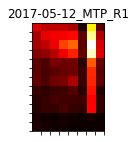

In [4]:
#heatmap of microwellplate
# legend (color bar)

data = output.convert_objects(convert_numeric=True)
fig = plt.figure(figsize=(4.0,2))
plt.imshow(data.T,cmap='hot')
plt.xticks(np.arange(0.5, len(data.index), 1), [],rotation=90)
plt.yticks(np.arange(0.5, len(data.columns), 1), [])
plt.title(data_id,fontsize="large")
fig.savefig("./results/{}_heatmap.png".format(data_id),bbox_inches='tight')

plt.show()

## Errorbar plots aligned peptides


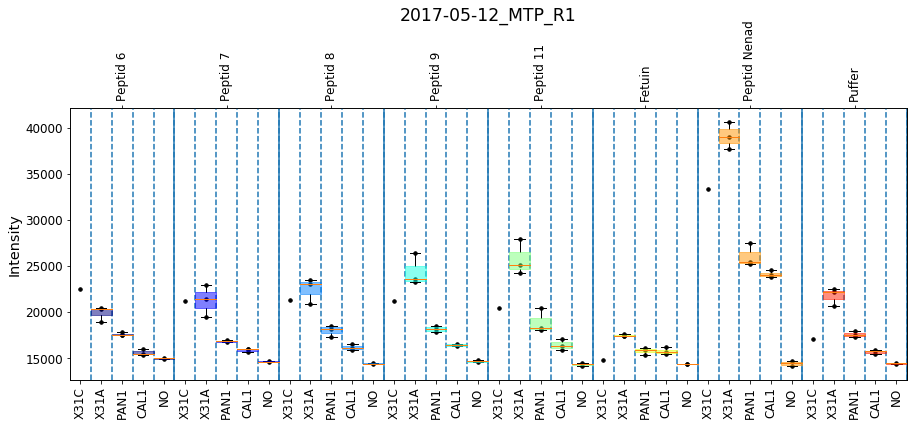

In [5]:
# overview plot of peptide-virus signal
fig = plt.figure(figsize=(15,5.0))
ax2 = plt.subplot(111)
ax = ax2.twiny()

# for x-axis ticks and labels
peptide_ticks_x_axis = []
peptide_label_x_axis = []

virus_ticks_x_axis = []
virus_label_x_axis = []

cmap  = plt.get_cmap('jet')
Nvirus = len(Spot["Virus"].unique())
Npeptides = len(Spot["Peptide"].unique())
spacing = 1.0/Nvirus

for index_peptide, peptide in enumerate(Spot["Peptide"].unique()):
    for index_virus, virus in enumerate(Spot["Virus"].unique()):
        plt.axvline(x=[index_peptide + index_virus * spacing + spacing * 0.5 ], linestyle='dashed')
        # add x-tick position and label for virus
        virus_ticks_x_axis.append(index_peptide + index_virus * spacing)
        virus_label_x_axis.append(virus)
        data=Spot.loc[(Spot['Peptide'] == peptide) & (Spot["Virus"] == virus)]["Intensity"]
        data_std=Spot.loc[(Spot['Peptide'] == peptide) & (Spot["Virus"] == virus)]["Std"]

        ax.scatter(index_peptide  * np.ones(data.shape) + index_virus * spacing, data, 
                   s=500/(Nvirus*Npeptides), color='k', marker='o')
        if len(data) > 1: 
            bp = ax.boxplot(data.values, positions=[index_peptide+index_virus*spacing], 
                             patch_artist=True, showfliers=False,widths=spacing)
            plt.setp(bp['boxes'], color=cmap(index_peptide*1.0 / Npeptides), alpha=0.5)

            #ax.errorbar(x=index_peptide  + index_virus * spacing,y=data.mean(),yerr = data.values.std(), alpha=0.5,lw=10)
            #ax.errorbar(x=index_peptide  + index_virus * spacing,y=data.mean(), yerr = np.sqrt(data.values.std()**2+data_std.mean()**2), color=cmap(index_virus*1.0 / Nvirus), alpha=0.5)
            
            
    # add x-tick position and label for peptide    
    peptide_ticks_x_axis.append(index_peptide + 0.5 - spacing * 0.5)
    peptide_label_x_axis.append(peptide)
    #draw vertical line to seperate peptides
    plt.axvline(x=index_peptide + 1 - spacing * 0.5 )

# setup upper x-axis    

#plt.xticks(peptide_ticks_x_axis,["peptide " + str(s) for s in output.columns],fontsize="large")

plt.xticks(peptide_ticks_x_axis,peptide_label_x_axis,fontsize="large",rotation=90)
ax.set_xlim(-0.5*spacing , index_peptide + 1 - spacing * 0.5 )

# setup lower x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(virus_ticks_x_axis)
#["peptide " + str(s) for s in output.columns]
ax2.set_xticklabels(virus_label_x_axis,rotation=90,fontsize="large")
ax2.tick_params(labelsize="large") 

ax2.set_ylabel("Intensity",fontsize="x-large")
# nicer plot
ax.set_title(data_id,y=1.30,fontsize="xx-large")
fig.savefig("./results/{}_barplot.png".format(data_id),bbox_inches='tight')

plt.show()

## Errorbar plots of aligned for viruses

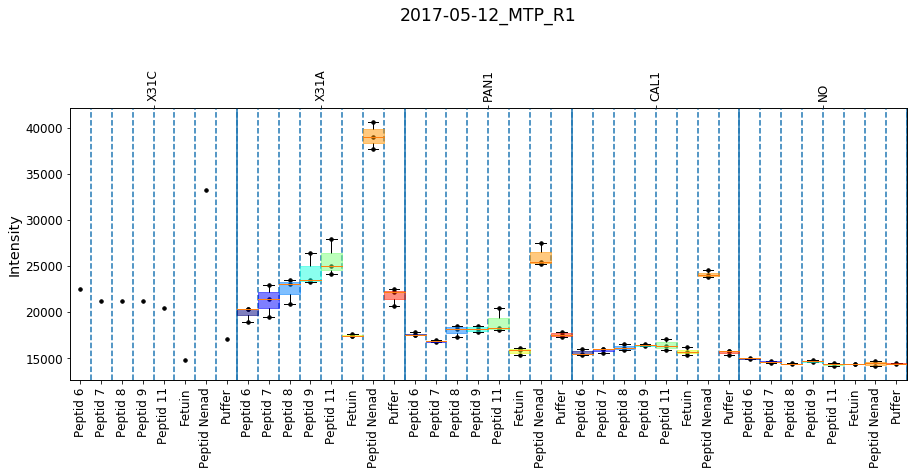

In [6]:
# overview plot of peptide-virus signal
fig = plt.figure(figsize=(15,5.0))
ax2 = plt.subplot(111)
ax = ax2.twiny()

# for x-axis ticks and labels
peptide_ticks_x_axis = []
peptide_label_x_axis = []

virus_ticks_x_axis = []
virus_label_x_axis = []

cmap  = plt.get_cmap('jet')
Nvirus = len(Spot["Virus"].unique())
Npeptides = len(Spot["Peptide"].unique())
spacing = 1.0/Npeptides
for index_virus, virus in enumerate(Spot["Virus"].unique()):
    for index_peptide, peptide in enumerate(Spot["Peptide"].unique()):
        plt.axvline(x=[index_virus + index_peptide * spacing + spacing * 0.5 ], linestyle='dashed')
        # add x-tick position and label for virus
        peptide_ticks_x_axis.append(index_virus + index_peptide * spacing)
        peptide_label_x_axis.append(peptide)
        data=Spot.loc[(Spot['Peptide'] == peptide) & (Spot["Virus"] == virus)]["Intensity"]
        ax.scatter(index_virus  * np.ones(data.shape) + index_peptide * spacing, data, 
                   s=500/(Nvirus*Npeptides), color='k', marker='o')
        
        if len(data) > 1: 
            bp = ax.boxplot(data.values, positions=[index_virus+index_peptide*spacing], 
                            patch_artist=True, showfliers=False,widths=spacing)
            plt.setp(bp['boxes'], color=cmap(index_peptide*1.0 / Npeptides), alpha=0.5)
            
    # add x-tick position and label for peptide    
    virus_ticks_x_axis.append(index_virus+ 0.5 - spacing * 0.5)
    virus_label_x_axis.append(virus)
    #draw vertical line to seperate peptides
    plt.axvline(x=index_virus + 1 - spacing * 0.5 )

# setup upper x-axis            
plt.xticks(virus_ticks_x_axis,virus_label_x_axis,fontsize="large",rotation=90)
ax.set_xlim(-0.5*spacing, index_virus + 1 - spacing * 0.5 )

# setup lower x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(peptide_ticks_x_axis)
ax2.set_xticklabels(peptide_label_x_axis,rotation=90,fontsize="large")
ax2.tick_params(labelsize="large") 

ax2.set_ylabel("Intensity",fontsize="x-large")

# nicer plot
ax.set_title(data_id,y=1.30,fontsize="xx-large")
fig.savefig("./results/{}_barplot2.png".format(data_id),bbox_inches='tight')

plt.show()

## PCA and reduction to 2 dimentions & plot

In [7]:
def map_strings_to_number(strings):
    """Transforms list of strings into numbers."""
    counter = 1
    d = {}
    numbers = []
    for s in strings:
        if s in d:
            pass
        else:
            d[s] = counter
            counter+=1
        numbers.append(d[s])
    return numbers
    
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""
    # Note that if base_cmap is a String or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for String, None, or a colormap instance:
    if N == 1:
        base = plt.cm.get_cmap(base_cmap)
        color_list = base(np.linspace(0, 1, N+1))
        cmap_name = base.name + str(N)
        
    else:
    
        base = plt.cm.get_cmap(base_cmap)
        color_list = base(np.linspace(0, 1, N))
        cmap_name = base.name + str(N)
        
    return base.from_list(cmap_name, color_list, N)

In [8]:
#reshapeing data for pca
Spots_PCA = Spot[["Peptide","Virus","Intensity","Replica"]]
Spots_Pre_PCA = Spots_PCA.set_index(["Virus","Peptide","Replica"])
Spots_PCA = Spots_Pre_PCA.pivot_table(index=["Virus","Replica"],columns="Peptide",values="Intensity")
# here a different method could be better. e.g. mean ...
Spots_PCA_complete = Spots_PCA.dropna()
#---------------------------------------#
# maybe an algorithm for selcting only 
# good peptides is reasonable
display(Spots_PCA_complete)

Peptide        Fetuin  Peptid 11  Peptid 6  Peptid 7  Peptid 8  Peptid 9  \
Virus Replica                                                              
CAL1  0         15413      17123     16040     15627     16112     16342   
      1         16235      16355     15512     15994     16577     16397   
      2         15651      15922     15336     16007     15901     16581   
NO    0         14359      14501     14911     14540     14386     14781   
      1         14415      14197     15073     14721     14445     14590   
PAN1  0         15398      18304     17500     16958     18548     18157   
      1         16092      18045     17502     16754     17280     17817   
      2         15869      20483     17854     16859     18186     18549   
X31A  0         17464      24198     20337     22922     23449     23548   
      1         17428      27889     20394     21386     23071     26460   
      2         17656      25058     18970     19488     20933     23260   
X31C  0         14842      20484     22508     21229     21266     21238   

Peptide        Peptid Nenad  Puffer  
Virus Replica                        
CAL1  0               24531   15414  
      1               23775   15843  
      2               23985   15810  
NO    0               14735   14468  
      1               14174   14412  
PAN1  0               27502   17905  
      1               25468   17283  
      2               25260   17494  
X31A  0               37703   20670  
      1               40646   22175  
      2               39031   22479  
X31C  0               33306   17090

In [9]:
if len(Spots_PCA_complete.columns) > 1 and len(Spots_PCA_complete.index) > 1 :
    #build model
    pca = decomposition.PCA()
    pca.fit(Spots_PCA_complete)
    #perform pca
    pca_score = pca.explained_variance_ratio_ 
    pca_components = pca.components_
    x_train_pca = pca.transform(Spots_PCA_complete)

    output_pca = pd.DataFrame(x_train_pca, index = Spots_PCA_complete.index)
    # store color information
    output_pca.insert(0, "color", map_strings_to_number(Spots_PCA_complete.index.droplevel(1)))
    #output_pca.insert(1, "virus", output.index)


    print("PCA score for principal components (explained variance):\n", pca_score.round(3))
    corr_values = dict(zip(Spots_PCA_complete.columns, pca_components[0]))
    feature_max_cor = max(corr_values, key=corr_values.get)
    print("Feature with max. Variation:",feature_max_cor )
    print("PCA Components in feature space:", pca_components[0])


    cor_to_strongest_feature = Spots_PCA_complete[Spots_PCA_complete.columns[:]].corr()[feature_max_cor][:]
    print("\nThe Correlation of the Features to the Feature with highest Varaiance")
    print(cor_to_strongest_feature)
elif len(Spots_PCA_complete.columns) < 2:
    Print("You have selected measuraments with less than two peptides. No PCA is possible ")
elif len(Spots_PCA_complete.index) < 2:
    Print("You have selected measuraments with less than two two viruses (also replica) with complete set." \
    "No PCA is possible" )

('PCA score for principal components (explained variance):\n', array([ 0.951,  0.025,  0.016,  0.004,  0.002,  0.001,  0.001,  0.   ]))
('Feature with max. Variation:', 'Peptid Nenad')
('PCA Components in feature space:', array([ 0.08073223,  0.36495278,  0.18252918,  0.22640689,  0.26495517,
        0.32186458,  0.74204509,  0.22646376]))

The Correlation of the Features to the Feature with highest Varaiance
Peptide
Fetuin          0.831291
Peptid 11       0.945932
Peptid 6        0.837000
Peptid 7        0.910098
Peptid 8        0.954515
Peptid 9        0.961688
Peptid Nenad    1.000000
Puffer          0.928898
Name: Peptid Nenad, dtype: float64


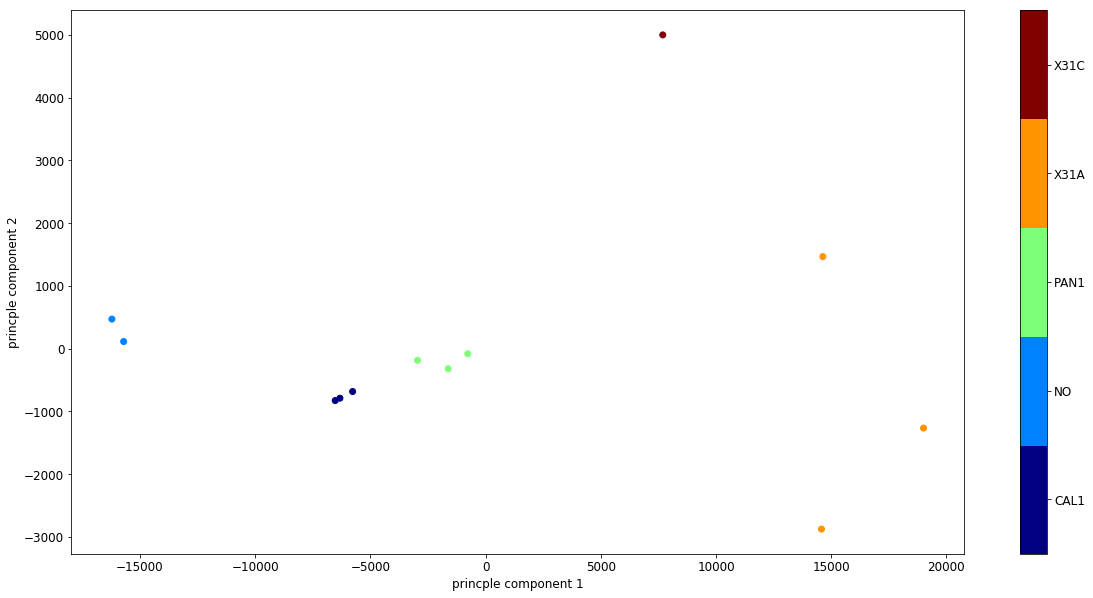

In [10]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel("princple component 1",  size='large')
plt.ylabel("princple component 2",  size='large')
plt.tick_params(labelsize="large") 
plt.scatter(output_pca[0], output_pca[1], 
            c=output_pca["color"].values, cmap=discrete_cmap(output_pca["color"].values.max(), 'jet'))


color_mapping = output_pca[['color']].sort_values(by=["color"])

cbar = plt.colorbar(ticks=sorted(output_pca["color"].unique()))
cbar.set_ticklabels(color_mapping.index.droplevel(1).unique())
cbar.ax.tick_params(labelsize="large") 
plt.clim(0.5, output_pca["color"].values.max() + 0.5)
fig.savefig("./results/{}_pca.png".format(data_id),bbox_inches='tight')

plt.show()

## Correlation analysis

In [11]:
from matplotlib.collections import EllipseCollection

def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90,fontsize="xx-large")
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index,fontsize="xx-large")

    return ec

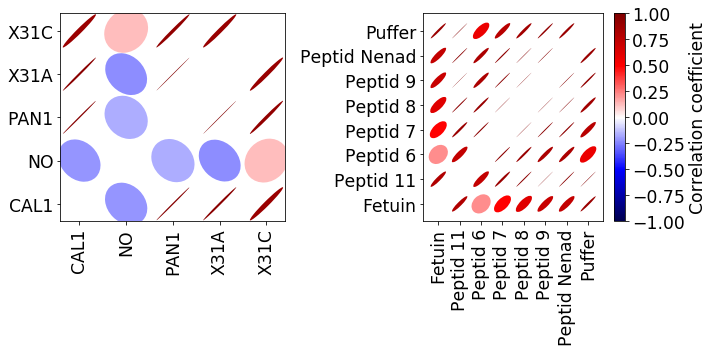

In [12]:
unique_virus_peptide = Spots_Pre_PCA.pivot_table(index="Virus",columns="Peptide",values="Intensity")
x = 2
if unique_virus_peptide.shape[0] < x or unique_virus_peptide.shape[1] < x:
    print("{}: Number of unique viruses".format(unique_virus_peptide.shape[0]))
    print("{}: Number of unique peptides".format(unique_virus_peptide.shape[1]))
    print("-> Not enough unique viruses or peptides in data set")
    
else:
    data = unique_virus_peptide.T.corr()
    f, (ax, ax2) = plt.subplots(1, 2,figsize=(10,5.0))
    m = plot_corr_ellipses(data, ax=ax, cmap='seismic',clim=[-1, 1])

    ax.margins(0.1)

    m = plot_corr_ellipses(unique_virus_peptide.corr(), ax=ax2, cmap='seismic',clim=[-1, 1])
    cb = f.colorbar(m)
    cb.ax.tick_params(labelsize="xx-large") 

    cb.set_label('Correlation coefficient',fontsize="xx-large")
    ax2.margins(0.1)
    f.tight_layout()

    f.savefig("./results/{}_corr_matrix_plot.png".format(data_id),bbox_inches='tight')

    plt.show()